<a href="https://colab.research.google.com/github/lauramaria99/Se-alesFisiologicas/blob/main/Proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa de Bioingeniería** 

###**Bioseñales y Sistemas** 

###**Proyecto 4**

**INTEGRANTES** 

- Isabella Ariza Cuberos - C.C 1152470641 
- Laura María Muñoz Bravo - C.C 1216729952
- Maria Camila Parra Córdoba - C.C 1233191182 


In [ ]:
#Se importantan las librerias necesarias para el desarrollo del trabajo. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
#Lectura de los datos guardados en el DataFrame.
df = pd.read_csv('DATOS1.csv') 
print(df.shape)
df.head()

(4919, 7)


,Varianza,Rango,SMA gruesa,SMA fina,Espectro medio,PSD prom,Outcome
0,1.439470e-07,0.003526,9.771037,16.595423,1.310650e-11,9.291749e-11,0
1,1.219542e-07,0.003512,9.061496,14.030016,1.083803e-11,9.056026e-11,0
2,1.296732e-07,0.003461,9.350690,13.859690,1.149865e-11,9.430518e-11,0
3,1.157771e-07,0.003517,8.231898,12.882619,1.030226e-11,9.286152e-11,0
4,1.102904e-07,0.003527,8.176917,12.942420,1.013497e-11,8.701691e-11,0


In [ ]:
#Se dividen los dataframe para las posteriores comparaciones.
df0 = df[df['Outcome'] == 0]
df1 = df[df['Outcome'] == 1]
df2 = df[df['Outcome'] == 2]

####**- Normalizar las características obtenidas del trabajo 3. Discuta cuales características podrían tener mayor potencial para construir un sistema de clasificación entre las diferentes clases (normal, sibilancia, crepitancia).**

In [ ]:
#Normalización de las características de sujetos normales.
n=df0
outc = ['Outcome'] 
predc = list(set(list(n.columns))-set(outc))
n[predc] = n[predc]/n[predc].max()
n.describe()

,Varianza,Rango,SMA gruesa,SMA fina,Espectro medio,PSD prom,Outcome
count,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.0
mean,0.013137,0.081981,0.087765,0.051565,0.013081,0.043769,0.0
std,0.044380,0.097233,0.107749,0.066647,0.044165,0.102980,0.0
min,0.000002,0.001690,0.001666,0.000841,0.000002,0.000006,0.0
25%,0.000200,0.017407,0.018001,0.011520,0.000201,0.000893,0.0
50%,0.001341,0.045437,0.044652,0.026329,0.001330,0.004593,0.0
75%,0.009416,0.111968,0.117419,0.065749,0.009370,0.038113,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
#Normalización de las caracteristicas de los sujetos sibilantes.
n1=df1
outc1 = ['Outcome'] 
predc1 = list(set(list(n1.columns))-set(outc1))
n1[predc1] = n1[predc1]/n1[predc1].max()
n1.describe()

,Varianza,Rango,SMA gruesa,SMA fina,Espectro medio,PSD prom,Outcome
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.0
mean,0.030123,0.099667,0.135677,0.113001,0.029654,0.055343,1.0
std,0.079381,0.111453,0.154808,0.132902,0.078906,0.120146,0.0
min,0.000006,0.002702,0.002737,0.002765,0.000006,0.000006,1.0
25%,0.000490,0.019209,0.028330,0.022965,0.000484,0.001126,1.0
50%,0.005215,0.064751,0.085202,0.068848,0.005176,0.009058,1.0
75%,0.024274,0.136297,0.182512,0.155851,0.023325,0.053200,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
#Normalización de las caracteristicas de los sujetos crepitantes.
n2=df2
outc2 = ['Outcome'] 
predc2 = list(set(list(n2.columns))-set(outc2))
n2[predc2] = n2[predc2]/n2[predc2].max()
n2.describe()

,Varianza,Rango,SMA gruesa,SMA fina,Espectro medio,PSD prom,Outcome
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.0
mean,0.073366,0.243830,0.160739,0.167450,0.072005,0.066319,2.0
std,0.117088,0.186571,0.133261,0.140824,0.115028,0.117076,0.0
min,0.000016,0.004285,0.002908,0.003237,0.000016,0.000012,2.0
25%,0.005938,0.093288,0.059143,0.063267,0.005839,0.004550,2.0
50%,0.028481,0.202409,0.126841,0.135009,0.027924,0.020622,2.0
75%,0.089896,0.356311,0.226600,0.227342,0.088295,0.072947,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [ ]:
#CREACIÓN DE LOS DATAFRAME CON DATOS ANTERIORMENTE NORMALIZADOS. 
#Normales y sibilantes.
n_s=pd.concat([n,n1])

#Normales y crepitantes.
n_c=pd.concat([n,n2]) 

#Sibilantes y crepitantes.
s_c=pd.concat([n1,n2]) 

#Normales ,crepitantes,sibilantes.
n_s_c=pd.concat([n,n1,n2])

Los índices característicos utilizados en este trabajo corresponden a unos índices anteriormente extraídos y validados después de haber realizado el preprocesamiento y acondicionamiento de la señal, encontrando que los seis índices obtenidos presentan características estadísticamente diferenciables entre las tres poblaciones de estudio, como lo son los sujetos normales, crepitantes y sibilantes, por lo cual, estos índices resultan significativos a la hora de desarrollar un sistema de clasificación entre los sujetos mencionados a partir de las variaciones de las características en el dominio del tiempo y frecuencia, pues, el propósito de la creación del algoritmo es encontrar patrones entre las variables de entrada y la clase de salida para así ser capaz de aprender nuevos patrones, para clasificarlos y generalizarlos a nuevos ejemplos teniendo así un modelo predictivo acertivo.




####**ENTRENAMIENTO DEL MODELO**

Con el fin de crear un modelo de aprendizaje automático que sea capaz de clasificar datos conocidos y desconocidos es necesario entrenar el modelo con datos previamente etiquetados para que el algoritmo genere un modelo de clasificación. Posteriormente se hace necesario realizar una etapa de prueba y validación, con el fin de evaluar el desempeño del modelo y que sea capaz de diferenciar datos con los que no ha sido entrenado. 

Se tuvo en cuenta el 80% de los datos para entrenamiento y el 20% de los datos restantes se dividieron en datos de prueba y validación. 

Para la creación de las arquitecturas de las redes neuronales se determinó que el número de neuronas de entrada iba a ser igual al número de características más uno, siendo esta de siete, y el número de capas ocultas será mayor a dos, pues a partir de esta cantidad es posible crear un modelo de clasificación. Partiendo de estas condiciones se hacen variaciones en la cantidad de capas ocultas y cantidad de neuronas que estas poseen para así determinar el mejor modelo de red. 

####**- Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas, de una red neuronal que permita la clasificación de ciclos normales vs ciclos con sibilancias.**

In [ ]:
outb = ['Outcome'] 
predb = list(set(list(n_s.columns))-set(outb))
Xb= n_s[predb].values
yb = n_s[outb].values

#División de los datos para realizar el entrenamiento, validación y prueba.
X_b, Xb_val, y_b, yb_val = train_test_split(Xb, yb, test_size=0.20, random_state=40)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.30, random_state=40)

yb_test = np.squeeze(yb_test)
yb_train = np.squeeze(yb_train)
yb_val=np.squeeze(yb_val)


####**- ARQUITECTURA #1**

In [ ]:
#Creación de la red
mlp1 = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=1000) 

#Entrenamiento de la red
mlp1.fit(Xb_train,yb_train)
predictb_train = mlp1.predict(Xb_train)
predictb_test = mlp1.predict(Xb_test)
predictb_val = mlp1.predict(Xb_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yb_train,predictb_train))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_train,predictb_train,target_names=targetb_names))

Matriz de confusión de entrenamiento
[[1459   16]
 [  94  272]]

              precision    recall  f1-score   support

    Normales       0.94      0.99      0.96      1475
  Sibilantes       0.94      0.74      0.83       366

    accuracy                           0.94      1841
   macro avg       0.94      0.87      0.90      1841
weighted avg       0.94      0.94      0.94      1841



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yb_test,predictb_test))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_test,predictb_test,target_names=targetb_names))

Matriz de confusión de prueba
[[619  10]
 [ 48 112]]

              precision    recall  f1-score   support

    Normales       0.93      0.98      0.96       629
  Sibilantes       0.92      0.70      0.79       160

    accuracy                           0.93       789
   macro avg       0.92      0.84      0.87       789
weighted avg       0.93      0.93      0.92       789



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yb_val,predictb_val))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_val,predictb_val,target_names=targetb_names))

Matriz de confusión de validación
[[516  13]
 [ 37  92]]

              precision    recall  f1-score   support

    Normales       0.93      0.98      0.95       529
  Sibilantes       0.88      0.71      0.79       129

    accuracy                           0.92       658
   macro avg       0.90      0.84      0.87       658
weighted avg       0.92      0.92      0.92       658



####**- ARQUITECTURA #2**

In [ ]:
#Creación de la red
mlp2 = MLPClassifier(hidden_layer_sizes=(7,7,7),activation='relu', solver='adam', max_iter=1000) 
mlp2.fit(Xb_train,yb_train)

predictb2_train = mlp2.predict(Xb_train)
predictb2_test = mlp2.predict(Xb_test)
predictb2_val = mlp2.predict(Xb_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yb_train,predictb2_train))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_train,predictb2_train,target_names=targetb_names))

Matriz de confusión de entrenamiento
[[1462   13]
 [ 102  264]]

              precision    recall  f1-score   support

    Normales       0.93      0.99      0.96      1475
  Sibilantes       0.95      0.72      0.82       366

    accuracy                           0.94      1841
   macro avg       0.94      0.86      0.89      1841
weighted avg       0.94      0.94      0.93      1841



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yb_test,predictb2_test))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_test,predictb2_test,target_names=targetb_names))

Matriz de confusión de prueba
[[622   7]
 [ 47 113]]

              precision    recall  f1-score   support

    Normales       0.93      0.99      0.96       629
  Sibilantes       0.94      0.71      0.81       160

    accuracy                           0.93       789
   macro avg       0.94      0.85      0.88       789
weighted avg       0.93      0.93      0.93       789



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión')
print(confusion_matrix(yb_val,predictb2_val))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_val,predictb2_val,target_names=targetb_names))

Matriz de confusión
[[516  13]
 [ 37  92]]

              precision    recall  f1-score   support

    Normales       0.93      0.98      0.95       529
  Sibilantes       0.88      0.71      0.79       129

    accuracy                           0.92       658
   macro avg       0.90      0.84      0.87       658
weighted avg       0.92      0.92      0.92       658



####**- ARQUITECTURA #3**

In [ ]:
#Creación de la red
mlp3 = MLPClassifier(hidden_layer_sizes=(7,7,7,7),activation='relu', solver='adam', max_iter=1000) 
mlp3.fit(Xb_train,yb_train)

predictb3_train = mlp3.predict(Xb_train)
predictb3_test = mlp3.predict(Xb_test)
predictb3_val = mlp3.predict(Xb_val)

In [ ]:
#Matriz de confusión de entrenamiento 
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yb_train,predictb3_train))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_train,predictb3_train,target_names=targetb_names))

Matriz de confusión de entrenamiento
[[1460   15]
 [  91  275]]

              precision    recall  f1-score   support

    Normales       0.94      0.99      0.96      1475
  Sibilantes       0.95      0.75      0.84       366

    accuracy                           0.94      1841
   macro avg       0.94      0.87      0.90      1841
weighted avg       0.94      0.94      0.94      1841



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yb_test,predictb3_test))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_test,predictb3_test,target_names=targetb_names))

Matriz de confusión de prueba
[[622   7]
 [ 43 117]]

              precision    recall  f1-score   support

    Normales       0.94      0.99      0.96       629
  Sibilantes       0.94      0.73      0.82       160

    accuracy                           0.94       789
   macro avg       0.94      0.86      0.89       789
weighted avg       0.94      0.94      0.93       789



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yb_val,predictb3_val))
targetb_names = ['Normales', 'Sibilantes']
print('')
print(classification_report(yb_val,predictb3_val,target_names=targetb_names))

Matriz de confusión de validación
[[518  11]
 [ 34  95]]

              precision    recall  f1-score   support

    Normales       0.94      0.98      0.96       529
  Sibilantes       0.90      0.74      0.81       129

    accuracy                           0.93       658
   macro avg       0.92      0.86      0.88       658
weighted avg       0.93      0.93      0.93       658



A partir de la evaluación métrica obtenida para cada una de las arquitecturas de clasificación de ciclos normales y sibilantes se encuentra que de un total de 1841 datos de entrenamiento, las tres arquitecturas tienen una exactitud del 94%, por lo tanto, es necesario analizar otras métricas ya que esta no permite determinar cual de ellas es la más acertiva. Las otras métricas a evaluar son la precisión y el f1-score, las cuales miden la proporciones de datos positivos clasificados correctamente y el rendimiento total del algoritmo de clasificación respectivamente. La elección de estas métricas se determinan ya que es importante que el paciente sea diagnósticado correctamente, entonces se determina que la arquitectura con mejor desempeño es la tercera que posee 4 capas ocultas con 7 neuronas cada una. Por otro lado, al analizar la matriz de confusión se encuentra que la cantidad de datos falsos positivos y falsos negativos son significativamente pequeños con relación a los verdaderos positivos y negativos. 

Finalmente, con el fin de verificar la presencia o no de un sobre-entrenamiento del modelo se evalúan las métricas para los datos anteriomente divididos en validación  y prueba encontrando que la exactitud, la presición y el f1-score, varían muy poco respecto a las metricas obtenidas en el entrenamiento, lo que da cuenta de que el modelo está clasificando correctamente. 



####**- Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas, de una red neuronal que permita la clasificación de ciclos normales vs ciclos con crepitancias.**

In [ ]:
outc = ['Outcome'] 
predc = list(set(list(n_c.columns))-set(outc))
Xc= n_c[predc].values
yc = n_c[outc].values
#Se dividen los datos en datos para entrenamiento,validación y prueba.
X_c, Xc_val, y_c, yc_val = train_test_split(Xc, yc, test_size=0.20, random_state=40)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.30, random_state=40)

yc_test = np.squeeze(yc_test)
yc_train = np.squeeze(yc_train)
yc_val=np.squeeze(yc_val)

####**- ARQUITECTURA #1**

In [ ]:
#Creación de la red
mlp1_1 = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp1_1.fit(Xc_train,yc_train)

predictc1_train = mlp1_1.predict(Xc_train)
predictc1_test = mlp1_1.predict(Xc_test)
predictc1_val = mlp1_1.predict(Xc_val)


In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yc_train,predictc1_train))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_train,predictc1_train,target_names=targetc_names))

Matriz de confusión de entrenamiento
[[1461   20]
 [  27  879]]

              precision    recall  f1-score   support

    Normales       0.98      0.99      0.98      1481
 Crepitantes       0.98      0.97      0.97       906

    accuracy                           0.98      2387
   macro avg       0.98      0.98      0.98      2387
weighted avg       0.98      0.98      0.98      2387



In [ ]:
# Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yc_test,predictc1_test))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_test,predictc1_test,target_names=targetc_names))

Matriz de confusión de prueba
[[638   6]
 [ 16 364]]

              precision    recall  f1-score   support

    Normales       0.98      0.99      0.98       644
 Crepitantes       0.98      0.96      0.97       380

    accuracy                           0.98      1024
   macro avg       0.98      0.97      0.98      1024
weighted avg       0.98      0.98      0.98      1024



In [ ]:
# Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yc_val,predictc1_val))
targetc_names = ['Normales', 'crepitantes']
print('')
print(classification_report(yc_val,predictc1_val,target_names=targetc_names))

Matriz de confusión de validación
[[501   7]
 [ 17 328]]

              precision    recall  f1-score   support

    Normales       0.97      0.99      0.98       508
 crepitantes       0.98      0.95      0.96       345

    accuracy                           0.97       853
   macro avg       0.97      0.97      0.97       853
weighted avg       0.97      0.97      0.97       853



####**- ARQUITECTURA #2**

In [ ]:
#Creación de la red
mlp1_2 = MLPClassifier(hidden_layer_sizes=(7,7,7), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp1_2.fit(Xc_train,yc_train)

predictc2_train = mlp1_2.predict(Xc_train)
predictc2_test = mlp1_2.predict(Xc_test)
predictc2_val = mlp1_2.predict(Xc_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yc_train,predictc2_train))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_train,predictc2_train,target_names=targetc_names))

Matriz de confusión de entrenamiento
[[1464   17]
 [  35  871]]

              precision    recall  f1-score   support

    Normales       0.98      0.99      0.98      1481
 Crepitantes       0.98      0.96      0.97       906

    accuracy                           0.98      2387
   macro avg       0.98      0.97      0.98      2387
weighted avg       0.98      0.98      0.98      2387



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yc_test,predictc2_test))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_test,predictc2_test,target_names=targetc_names))

Matriz de confusión de prueba
[[638   6]
 [ 15 365]]

              precision    recall  f1-score   support

    Normales       0.98      0.99      0.98       644
 Crepitantes       0.98      0.96      0.97       380

    accuracy                           0.98      1024
   macro avg       0.98      0.98      0.98      1024
weighted avg       0.98      0.98      0.98      1024



In [ ]:
# Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yc_val,predictc2_val))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_val,predictc2_val,target_names=targetc_names))

Matriz de confusión de validación
[[501   7]
 [ 20 325]]

              precision    recall  f1-score   support

    Normales       0.96      0.99      0.97       508
 Crepitantes       0.98      0.94      0.96       345

    accuracy                           0.97       853
   macro avg       0.97      0.96      0.97       853
weighted avg       0.97      0.97      0.97       853



####**- ARQUITECTURA #3**

In [ ]:
#Creación de la red
mlp1_3 = MLPClassifier(hidden_layer_sizes=(7,7,7,7), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp1_3.fit(Xc_train,yc_train)

predictc3_train = mlp1_3.predict(Xc_train)
predictc3_test = mlp1_3.predict(Xc_test)
predictc3_val = mlp1_3.predict(Xc_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yc_train,predictc3_train))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_train,predictc3_train,target_names=targetc_names))

Matriz de confusión de entrenamiento
[[1464   17]
 [  54  852]]

              precision    recall  f1-score   support

    Normales       0.96      0.99      0.98      1481
 Crepitantes       0.98      0.94      0.96       906

    accuracy                           0.97      2387
   macro avg       0.97      0.96      0.97      2387
weighted avg       0.97      0.97      0.97      2387



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yc_test,predictc3_test))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_test,predictc3_test,target_names=targetc_names))

Matriz de confusión de prueba
[[635   9]
 [ 17 363]]

              precision    recall  f1-score   support

    Normales       0.97      0.99      0.98       644
 Crepitantes       0.98      0.96      0.97       380

    accuracy                           0.97      1024
   macro avg       0.97      0.97      0.97      1024
weighted avg       0.97      0.97      0.97      1024



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yc_val,predictc3_val))
targetc_names = ['Normales', 'Crepitantes']
print('')
print(classification_report(yc_val,predictc3_val,target_names=targetc_names))

Matriz de confusión de validación
[[501   7]
 [ 24 321]]

              precision    recall  f1-score   support

    Normales       0.95      0.99      0.97       508
 Crepitantes       0.98      0.93      0.95       345

    accuracy                           0.96       853
   macro avg       0.97      0.96      0.96       853
weighted avg       0.96      0.96      0.96       853



A partir de la evaluación métrica obtenida para cada una de las arquitecturas de clasificación de ciclos normales y crepitantes se encuentra que de un total de 2387 datos de entrenamiento, dos de las arquitecturas evaluadas tienen una exactitud del 98%, siendo la tercera inferior a este valor, por lo tanto, es necesario analizar otras métricas ya que esta no permite determinar cual de las dos es la más acertiva. Para esto, nuevamente se evalúa la precisión y el f1-score. La elección de estas métricas está relacionada al correcto diagnóstico para el paciente, encontrando que para la métrica f1-score y precisión se obtienen resultados mas cercanos a 1 para la arquitectura #2 que posee 3 capas ocultas con 7 neuronas cada una. Por otro lado, al analizar la matriz de confusión se encuentra que la cantidad de datos falsos positivos y falsos negativos son significativamente pequeños con relación a los verdaderos positivos y negativos. 

Para verificar que la red esté entrenada de manera eficaz se evalúan las métricas para los datos de validación y prueba encontrando que la exactitud, la presición y el f1-score, varían muy poco respecto a las metricas obtenidas en el entrenamiento, lo que da cuenta de que el modelo está clasificando correctamente y no presenta sobre-entrenamiento.

####**- Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas, de una red neuronal que permita la clasificación de ciclos con sibilancias vs ciclos con crepitancias.**

In [ ]:
outd = ['Outcome'] 
predd = list(set(list(s_c.columns))-set(outd))
Xd= s_c[predd].values
yd = s_c[outd].values
#Se dividen los datos en datos para entrenamiento,validación y prueba.
X_d, Xd_val, y_d, yd_val = train_test_split(Xd, yd, test_size=0.20, random_state=40)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_d, y_d, test_size=0.30, random_state=40)

yd_test = np.squeeze(yd_test)
yd_train = np.squeeze(yd_train)
yd_val=np.squeeze(yd_val)

####**- ARQUITECTURA #1**

In [ ]:
#Creación de la red
mlp2_1 = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp2_1.fit(Xd_train,yd_train)

predictd1_train = mlp2_1.predict(Xd_train)
predictd1_test = mlp2_1.predict(Xd_test)
predictd1_val = mlp2_1.predict(Xd_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yd_train,predictd1_train))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_train,predictd1_train,target_names=targetd_names))

Matriz de confusión de entrenamiento
[[344  16]
 [ 20 899]]

              precision    recall  f1-score   support

  Sibilantes       0.95      0.96      0.95       360
 Crepitantes       0.98      0.98      0.98       919

    accuracy                           0.97      1279
   macro avg       0.96      0.97      0.97      1279
weighted avg       0.97      0.97      0.97      1279



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yd_test,predictd1_test))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_test,predictd1_test,target_names=targetd_names))

Matriz de confusión de prueba
[[159   5]
 [  3 382]]

              precision    recall  f1-score   support

  Sibilantes       0.98      0.97      0.98       164
 Crepitantes       0.99      0.99      0.99       385

    accuracy                           0.99       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.99      0.99      0.99       549



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yd_val,predictd1_val))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_val,predictd1_val,target_names=targetd_names))

Matriz de confusión de validación
[[123   8]
 [  4 323]]

              precision    recall  f1-score   support

  Sibilantes       0.97      0.94      0.95       131
 Crepitantes       0.98      0.99      0.98       327

    accuracy                           0.97       458
   macro avg       0.97      0.96      0.97       458
weighted avg       0.97      0.97      0.97       458



####**- ARQUITECTURA #2**

In [ ]:
#Creación de la red
mlp2_2 = MLPClassifier(hidden_layer_sizes=(7,7,7), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp2_2.fit(Xd_train,yd_train)

predictd2_train = mlp2_2.predict(Xd_train)
predictd2_test = mlp2_2.predict(Xd_test)
predictd2_val = mlp2_2.predict(Xd_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yd_train,predictd2_train))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_train,predictd2_train,target_names=targetd_names))

Matriz de confusión de entrenamiento
[[336  24]
 [  9 910]]

              precision    recall  f1-score   support

  Sibilantes       0.97      0.93      0.95       360
 Crepitantes       0.97      0.99      0.98       919

    accuracy                           0.97      1279
   macro avg       0.97      0.96      0.97      1279
weighted avg       0.97      0.97      0.97      1279



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yd_test,predictd2_test))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_test,predictd2_test,target_names=targetd_names))

Matriz de confusión de prueba
[[159   5]
 [  2 383]]

              precision    recall  f1-score   support

  Sibilantes       0.99      0.97      0.98       164
 Crepitantes       0.99      0.99      0.99       385

    accuracy                           0.99       549
   macro avg       0.99      0.98      0.98       549
weighted avg       0.99      0.99      0.99       549



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yd_val,predictd2_val))
targetd_names = ['sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_val,predictd2_val,target_names=targetd_names))

Matriz de confusión de validación
[[122   9]
 [  5 322]]

              precision    recall  f1-score   support

  sibilantes       0.96      0.93      0.95       131
 Crepitantes       0.97      0.98      0.98       327

    accuracy                           0.97       458
   macro avg       0.97      0.96      0.96       458
weighted avg       0.97      0.97      0.97       458



####**- ARQUITECTURA #3**

In [ ]:
#Creación de la red
mlp2_3 = MLPClassifier(hidden_layer_sizes=(7,7,7,7), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp2_3.fit(Xd_train,yd_train)

predictd3_train = mlp2_3.predict(Xd_train)
predictd3_test = mlp2_3.predict(Xd_test)
predictd3_val = mlp2_3.predict(Xd_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(yd_train,predictd3_train))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_train,predictd3_train,target_names=targetd_names))

Matriz de confusión de entrenamiento
[[341  19]
 [ 10 909]]

              precision    recall  f1-score   support

  Sibilantes       0.97      0.95      0.96       360
 Crepitantes       0.98      0.99      0.98       919

    accuracy                           0.98      1279
   macro avg       0.98      0.97      0.97      1279
weighted avg       0.98      0.98      0.98      1279



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(yd_test,predictd3_test))
targetd_names = ['sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_test,predictd3_test,target_names=targetd_names))

Matriz de confusión de prueba
[[159   5]
 [  4 381]]

              precision    recall  f1-score   support

  sibilantes       0.98      0.97      0.97       164
 Crepitantes       0.99      0.99      0.99       385

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(yd_val,predictd3_val))
targetd_names = ['Sibilantes', 'Crepitantes']
print('')
print(classification_report(yd_val,predictd3_val,target_names=targetd_names))

Matriz de confusión de validación
[[124   7]
 [  5 322]]

              precision    recall  f1-score   support

  Sibilantes       0.96      0.95      0.95       131
 Crepitantes       0.98      0.98      0.98       327

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



A partir de la evaluación métrica obtenida para cada una de las arquitecturas de clasificación de ciclos sibilantes y crepitantes se encuentra que de un total de 1279 datos de entrenamiento, dos de las arquitecturas evaluadas tienen una exactitud del 98%, siendo la tercera inferior a este valor, por lo tanto, se analizan otras métricas para determinar cual de las dos es la más acertiva, evaluando la precisión y el f1-score, ya que es importante poder diferenciar entre las dos afecciones respiratorias para aplicar el correcto tratamiento según el diagnóstico, encontrando que para la métrica f1-score y precisión se obtienen resultados mas cercanos a 1 para la arquitectura #3 que posee 4 capas ocultas con 7 neuronas cada una. Además, la matriz de confusión indica que la cantidad de datos falsos positivos y falsos negativos son significativamente pequeños con relación a los verdaderos positivos y negativos. 

Adicionalmente, al observar las métricas de exactitud presición y f1-score, para los datos de validación y prueba se presenta una diferencia insignificante con respecto a las metricas de entrenamiento, concluyendo que el modelo está clasificando correctamente y no presenta sobre-entrenamiento.

#### **- Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas, de una red neuronal que permita la clasificación de ciclos normales, ciclos con crepitancias y ciclos con sibilancias.**

In [ ]:
oute = ['Outcome'] 
prede = list(set(list(n_s_c.columns))-set(oute))
X = n_s_c[prede].values
y = n_s_c[oute].values
#Se dividen los datos en datos para entrenamiento,validación y prueba.
X_, X_val, y_, y_val = train_test_split(X, y, test_size=0.20, random_state=40)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.30, random_state=40)

y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
y_val=np.squeeze(y_val)

####**- ARQUITECTURA #1**

In [ ]:
#Creación de la red 
mlp3_1 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp3_1.fit(X_train,y_train)

predict1_train = mlp3_1.predict(X_train)
predict1_test = mlp3_1.predict(X_test)
predict1_val = mlp3_1.predict(X_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión')
print(confusion_matrix(y_train,predict1_train))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_train,predict1_train,target_names=target_names))

Matriz de confusión
[[1453   28   17]
 [  78  272    8]
 [  34    6  858]]

              precision    recall  f1-score   support

    Normales       0.93      0.97      0.95      1498
  Sibilantes       0.89      0.76      0.82       358
 Crepitantes       0.97      0.96      0.96       898

    accuracy                           0.94      2754
   macro avg       0.93      0.90      0.91      2754
weighted avg       0.94      0.94      0.94      2754



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión')
print(confusion_matrix(y_test,predict1_test))
target_names = ['Normales','Sibilantes','Crepitantes']
print('')
print(classification_report(y_test,predict1_test,target_names=target_names))

Matriz de confusión
[[598  16   6]
 [ 34 119   7]
 [ 20   5 376]]

              precision    recall  f1-score   support

    Normales       0.92      0.96      0.94       620
  Sibilantes       0.85      0.74      0.79       160
 Crepitantes       0.97      0.94      0.95       401

    accuracy                           0.93      1181
   macro avg       0.91      0.88      0.90      1181
weighted avg       0.92      0.93      0.92      1181



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión')
print(confusion_matrix(y_val,predict1_val))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_val,predict1_val,target_names=target_names))

Matriz de confusión
[[494  16   5]
 [ 39  93   5]
 [ 16   2 314]]

              precision    recall  f1-score   support

    Normales       0.90      0.96      0.93       515
  Sibilantes       0.84      0.68      0.75       137
 Crepitantes       0.97      0.95      0.96       332

    accuracy                           0.92       984
   macro avg       0.90      0.86      0.88       984
weighted avg       0.91      0.92      0.91       984



####**- ARQUITECTURA #2**

In [ ]:
#Creación de la red
mlp3_2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp3_2.fit(X_train,y_train)

predict2_train = mlp3_2.predict(X_train)
predict2_test = mlp3_2.predict(X_test)
predict2_val = mlp3_2.predict(X_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(y_train,predict2_train))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_train,predict2_train,target_names=target_names))

Matriz de confusión de entrenamiento
[[1458   24   16]
 [  76  273    9]
 [  18    7  873]]

              precision    recall  f1-score   support

    Normales       0.94      0.97      0.96      1498
  Sibilantes       0.90      0.76      0.82       358
 Crepitantes       0.97      0.97      0.97       898

    accuracy                           0.95      2754
   macro avg       0.94      0.90      0.92      2754
weighted avg       0.94      0.95      0.94      2754



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(y_test,predict2_test))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_test,predict2_test,target_names=target_names))

Matriz de confusión de prueba
[[605   8   7]
 [ 37 115   8]
 [ 14   7 380]]

              precision    recall  f1-score   support

    Normales       0.92      0.98      0.95       620
  Sibilantes       0.88      0.72      0.79       160
 Crepitantes       0.96      0.95      0.95       401

    accuracy                           0.93      1181
   macro avg       0.92      0.88      0.90      1181
weighted avg       0.93      0.93      0.93      1181



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(y_val,predict2_val))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_val,predict2_val,target_names=target_names))

Matriz de confusión de validación
[[498  13   4]
 [ 41  92   4]
 [  8   2 322]]

              precision    recall  f1-score   support

    Normales       0.91      0.97      0.94       515
  Sibilantes       0.86      0.67      0.75       137
 Crepitantes       0.98      0.97      0.97       332

    accuracy                           0.93       984
   macro avg       0.92      0.87      0.89       984
weighted avg       0.93      0.93      0.92       984



####**- ARQUITECTURA #3**

In [ ]:
#Creación de la red
mlp3_3 = MLPClassifier(hidden_layer_sizes=(15,15,15), activation='relu', solver='adam', max_iter=1000) 
#Entrenamiento de la red
mlp3_3.fit(X_train,y_train)

predict3_train = mlp3_3.predict(X_train)
predict3_test = mlp3_3.predict(X_test)
predict3_val = mlp3_3.predict(X_val)

In [ ]:
#Matriz de confusión de entrenamiento
print('Matriz de confusión de entrenamiento')
print(confusion_matrix(y_train,predict3_train))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_train,predict3_train,target_names=target_names))

Matriz de confusión de entrenamiento
[[1468   14   16]
 [  90  261    7]
 [  22    5  871]]

              precision    recall  f1-score   support

    Normales       0.93      0.98      0.95      1498
  Sibilantes       0.93      0.73      0.82       358
 Crepitantes       0.97      0.97      0.97       898

    accuracy                           0.94      2754
   macro avg       0.95      0.89      0.91      2754
weighted avg       0.94      0.94      0.94      2754



In [ ]:
#Matriz de confusión de prueba
print('Matriz de confusión de prueba')
print(confusion_matrix(y_test,predict3_test))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_test,predict3_test,target_names=target_names))

Matriz de confusión de prueba
[[605   8   7]
 [ 43 111   6]
 [ 13   5 383]]

              precision    recall  f1-score   support

    Normales       0.92      0.98      0.94       620
  Sibilantes       0.90      0.69      0.78       160
 Crepitantes       0.97      0.96      0.96       401

    accuracy                           0.93      1181
   macro avg       0.93      0.87      0.90      1181
weighted avg       0.93      0.93      0.93      1181



In [ ]:
#Matriz de confusión de validación
print('Matriz de confusión de validación')
print(confusion_matrix(y_val,predict3_val))
target_names = ['Normales','Sibilantes', 'Crepitantes']
print('')
print(classification_report(y_val,predict3_val,target_names=target_names))

Matriz de confusión de validación
[[501  10   4]
 [ 44  89   4]
 [  6   2 324]]

              precision    recall  f1-score   support

    Normales       0.91      0.97      0.94       515
  Sibilantes       0.88      0.65      0.75       137
 Crepitantes       0.98      0.98      0.98       332

    accuracy                           0.93       984
   macro avg       0.92      0.87      0.89       984
weighted avg       0.93      0.93      0.93       984



A partir de la evaluación métrica obtenida para cada una de las arquitecturas de clasificación de ciclo normales, sibilantes y crepitantes se encuentra que de un total de 2754 datos de entrenamiento, una de las arquitecturas evaluadas tienen una exactitud del 95%, siendo las dos restantes del 94%, sin embargo, el análisis de una sola métrica no garantiza la mejor elección del modelo de red, por lo tanto, se evalúa la precisión y el f1-score, ya que es importante poder diferenciar entre los tres tipos de ciclos respiratorios que se pueden presentar para aplicar el correcto tratamiento según sea el diagnóstico, encontrando que para la métrica f1-score y precisión se obtienen resultados mas cercanos a 1 para la arquitectura #2 que posee 3 capas ocultas con 10 neuronas cada una. Además, la matriz de confusión indica que la cantidad de datos clasificados correctamente corresponden a los ubicados en la diagonal de pendiente negativa, siendo estos significativamente mayores que el resto de datos ubicados en la matriz que corresponden a los clasificados erróneamente.  

Adicionalmente, al observar las métricas de exactitud presición y f1-score, para los datos de validación y prueba se presenta una diferencia insignificante con respecto a las metricas de entrenamiento, concluyendo que el modelo está clasificando correctamente y no presenta sobre-entrenamiento.

####**CONCLUSIÓN**



En la actualidad las redes neuronales y en general los algoritmos de aprendizaje automático están siendo utilizadas de manera exitosa como herramientas de apoyo para el diágnostico y detección de enfermedades con un previo entrenamiendo y validación de la eficacia del modelo mediante la utilizacion de datos previamente clasificados.

En el presente trabajo se desarrollaron 4 diferentes redes neuronales, en las cuales se logró diferenciar los ciclos respiratorios normales, sibilantes y crepitantes de una población de estudio, partiendo de datos previamente preprocesados, acondicionados y clasificados encontrando unas redes con una exactitud a partir del 94% siendo este un resultado confiable a la hora de la implementación de algoritmos de aprendizaje automático para el diagnóstico de enfermedades.  

Por otro lado, en el diseño de las redes se observó que entre mas datos y clases posea la red se necesitan mayor cantidad de neuronas en las capas ocultas para que el sistema de clasificación funcione correctamente. Además, se encontró que a pesar de que en la teoría se sugiere usar mayor cantidad de capas ocultas para un mejor sistema de clasificación, en los datos evaluados para este trabajo esta premisa no se cumplía en todos los casos. Finalmente, se determina que para este estudio, no es necesario utilizar una gran cantidad de neuronas para obtener un buen resultado, puesto que, se usaron máximo 4 capas ocultas y 15 neuronas, donde los resultados obtenidos fueron óptimos y significativos sin generar mayor gasto computacional. 

####**- Consultar como funciona, realizar y discutir un ejemplo con los datos de los ciclos respiratorios del algoritmo de K means.**

In [ ]:
#Lectura del DataFrame con los valores normalizados. 
dataframe=n_s_c
dataframe.head()

,Varianza,Rango,SMA gruesa,SMA fina,Espectro medio,PSD prom,Outcome
0,0.000092,0.010631,0.012898,0.008208,0.000092,0.000516,0
1,0.000078,0.010589,0.011961,0.006939,0.000076,0.000503,0
2,0.000083,0.010434,0.012343,0.006855,0.000080,0.000523,0
3,0.000074,0.010602,0.010866,0.006372,0.000072,0.000515,0
4,0.000070,0.010632,0.010794,0.006401,0.000071,0.000483,0


In [ ]:
#Se imprime la cantidad de ciclos normales, crepitantes y sibilantes. 
print(dataframe.groupby('Outcome').size())

Outcome
0    2633
1     655
2    1631
dtype: int64


In [ ]:
#Datos para alimentar el algoritmo. 
X = np.array(dataframe[["Rango","PSD prom","Espectro medio","Varianza","SMA gruesa","SMA fina"]])
y = np.array(dataframe['Outcome'])
X.shape

(4919, 6)

In [ ]:
#Elección de la cantidad de clusters.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.55606026 0.3518751  0.28796336 0.29244844 0.46096352 0.4337538 ]
 [0.27025225 0.10126637 0.06217972 0.06319605 0.22463122 0.18927266]
 [0.05916428 0.01145621 0.00431105 0.00436445 0.05441533 0.03980443]]


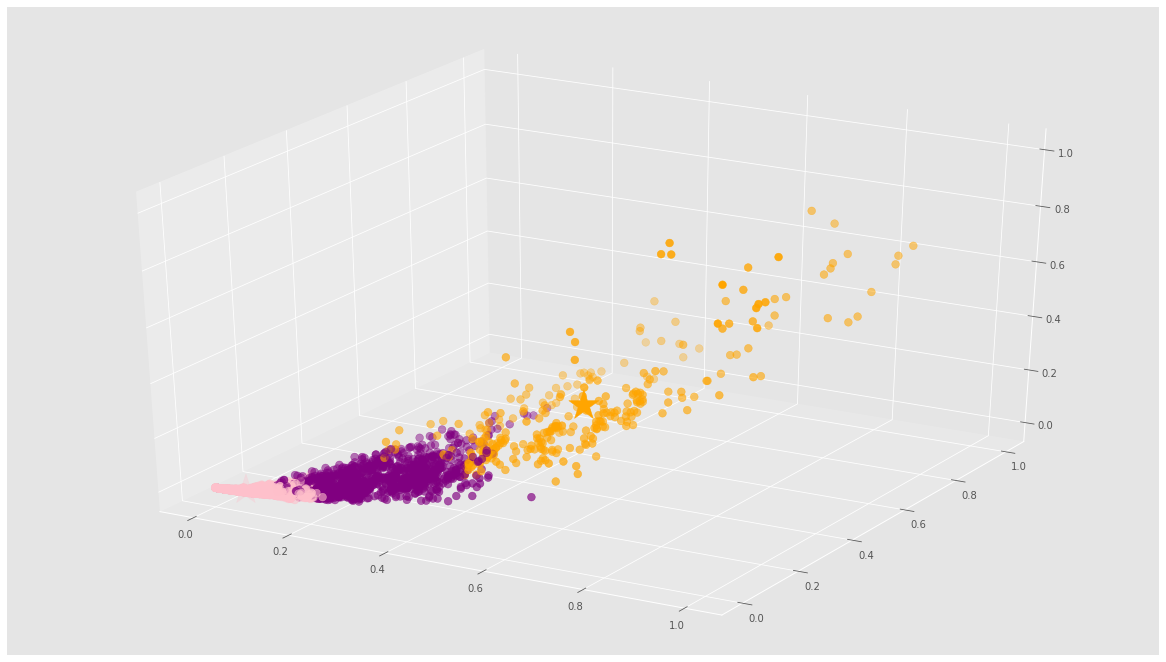

In [ ]:
#Predicción de los clusters. 
labels = kmeans.predict(X)

#Centroide de los clusters. 
C = kmeans.cluster_centers_
colores=['orange','purple','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])

#Se plotea los tres grupos elegidos para diferenciar los tres clusters. 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
#Cantidad de datos de cada uno de los clusters.
copy =  pd.DataFrame()
copy['Outcome']=dataframe['Outcome'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,orange,297
1,purple,1137
2,pink,3485


In [ ]:
#Predicción de cantidad de datos por la similitud entre las características evaluadas. 
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Outcome']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('Outcome').size()
diversidadGrupo

,Outcome,cantidad
0,0,52
1,1,37
2,2,208


In [ ]:
#Predicción de cantidad de datos por la similitud entre las características evaluadas. 
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Outcome']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('Outcome').size()
diversidadGrupo

,Outcome,cantidad
0,0,346
1,1,140
2,2,651


In [ ]:
#Predicción de cantidad de datos por la similitud entre las características evaluadas. 
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Outcome']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('Outcome').size()
diversidadGrupo

,Outcome,cantidad
0,0,2235
1,1,478
2,2,772


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroidoe.
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([3757, 4719, 2232])

Se puede apreciar que los ciclos respiratorios normales y crepitantes se agrupan en mayor proporción en dos grupos independientes, mientras que los ciclos sibilantes se agrupan en los tres grupos obtenidos mediante el método k means, encontrando que no es posible diferenciar los ciclos sibilantes. Por tanto, apesar de realizar la evaluación con todas las características del dominio del tiempo y frecuencia de la señal las cuales se habían verificado que tenían diferencias estadísticas, no es posible por el metodo de K means agrupar correctamente los ciclos normales, sibilantes y crepitantes, por tanto es necesario encontrar nuevas características que permitan agrupar correctamente cada grupo. 

 